In [1]:
import import_ipynb
%load_ext autoreload
%autoreload 2

In [2]:
%run requirements.ipynb
%run config.ipynb

In [3]:
"""
from module_preprocess import ( get_file_from_folder, 
                               transform_dataframe, 
                               save_fig, 
                               plot_day_data, 
                               data_cleaning_drop_zero,
                               data_cleaning_drop_48, 
                               data_cleaning_select_time,
                               drop_meter_from_df, 
                               plot_df_valuecounts_with_groupby, 
                               replace_missing_value,
                               read_smart_meter_csv)
"""                            
%run module_preprocess.ipynb

In [4]:
"""
from module_fdi_generator import (FdiGenerator, 
                                  split_group, 
                                  split_data_to_group, 
                                  plot_data)
"""  
%run module_fdi_generator.ipynb                               

In [5]:
%run module_training.ipynb

In [6]:
%run module_feature_extraction.ipynb

# 1. Data acquisition and pre-processing 

## Data acquisition

In [10]:
# read data from folder
data = get_file_from_folder(DATA_FOLDER_PATH)

In [11]:
"""
File1.txt (24465838, 3)
File2.txt (24507300, 3)
File3.txt (24394348, 3)
File4.txt (24617968, 3)
File5.txt (24571530, 3)
File6.txt (35436012, 3)
"""
for index, d in sorted(data.items()):
    print(index, d.shape)

File1.txt (24465838, 3)
File2.txt (24507300, 3)
File3.txt (24394348, 3)
File4.txt (24617968, 3)
File5.txt (24571530, 3)
File6.txt (35436012, 3)


In [14]:
# get residential list
res_list = []
df_sme = pd.read_excel(ALLOCATION_PATH, usecols="A:B")
df_sme = df_sme.loc[df_sme['Code'] == 1]
res_list = df_sme['ID'].tolist()

In [15]:
# filter res data and specific date
res_data_list = []
for index, name in enumerate(data):
    d = data[name]['MeterID'].isin(res_list)
    d_is_res = data[name].loc[d]
    
    d_is_res_and_date = transform_dataframe(d_is_res)
    
    res_data_list.append(d_is_res_and_date)

In [16]:
load_data = pd.concat(res_data_list, copy=False)
load_data.head(10)

,MeterID,Day,Time,Electricity,Datetime
221142,6000,2009-07-15,1,0.258,19501
221143,6000,2009-07-15,2,0.171,19502
221144,6000,2009-07-15,3,0.226,19503
221145,6000,2009-07-15,4,0.182,19504
221146,6000,2009-07-15,5,0.215,19505
221147,6000,2009-07-15,6,0.206,19506
221148,6000,2009-07-15,7,0.194,19507
221149,6000,2009-07-15,8,0.794,19508
221150,6000,2009-07-15,9,0.606,19509
221151,6000,2009-07-15,10,0.574,19510


In [17]:
load_data.shape

(108678770, 5)

## Data cleaning

Saving figure data quantity for each day in residential meter


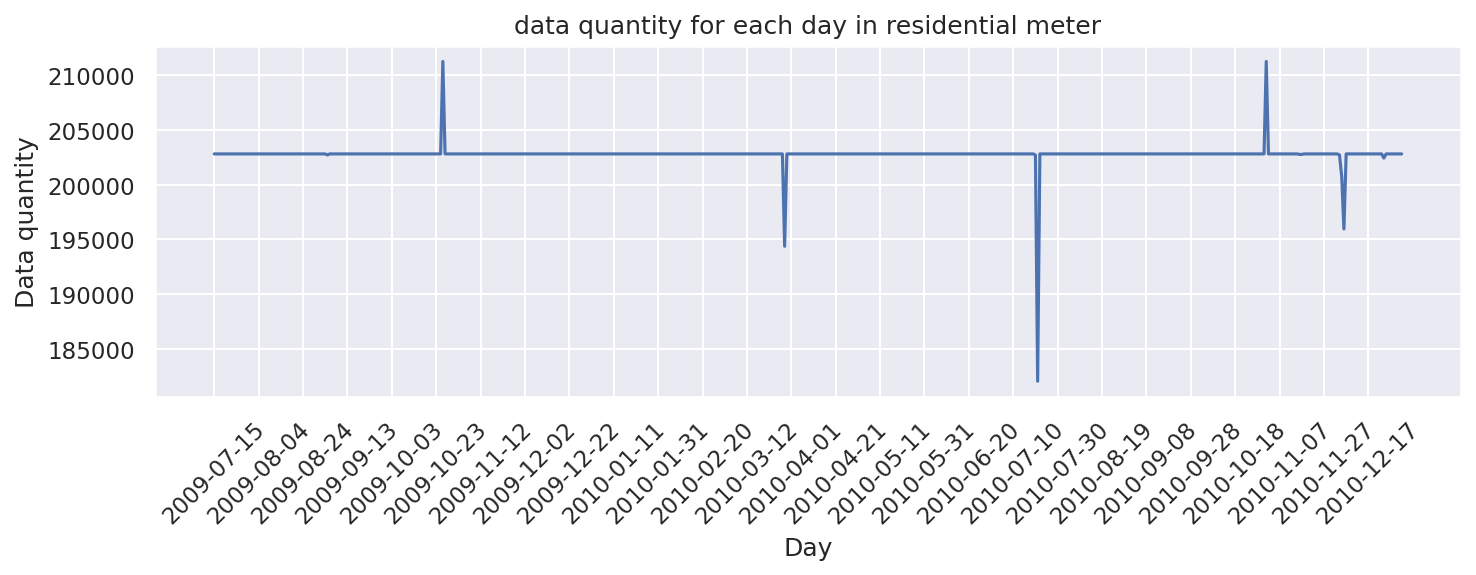

In [19]:
plot_day_data(load_data["Day"].value_counts().sort_index(), title="data quantity for each day in residential meter", save=True)

### select time interval

before drop Datetime between 19501 and 72948:  (108678770, 5)
after drop Datetime between 19501 and 72948:  (108475970, 5)
Saving figure data quantity in select time 2009.7.15-2010.12.31
(108475970, 5)
before drop Datetime between 73001 and 73048:  (108475970, 5)
after drop Datetime between 73001 and 73048:  (0, 5)


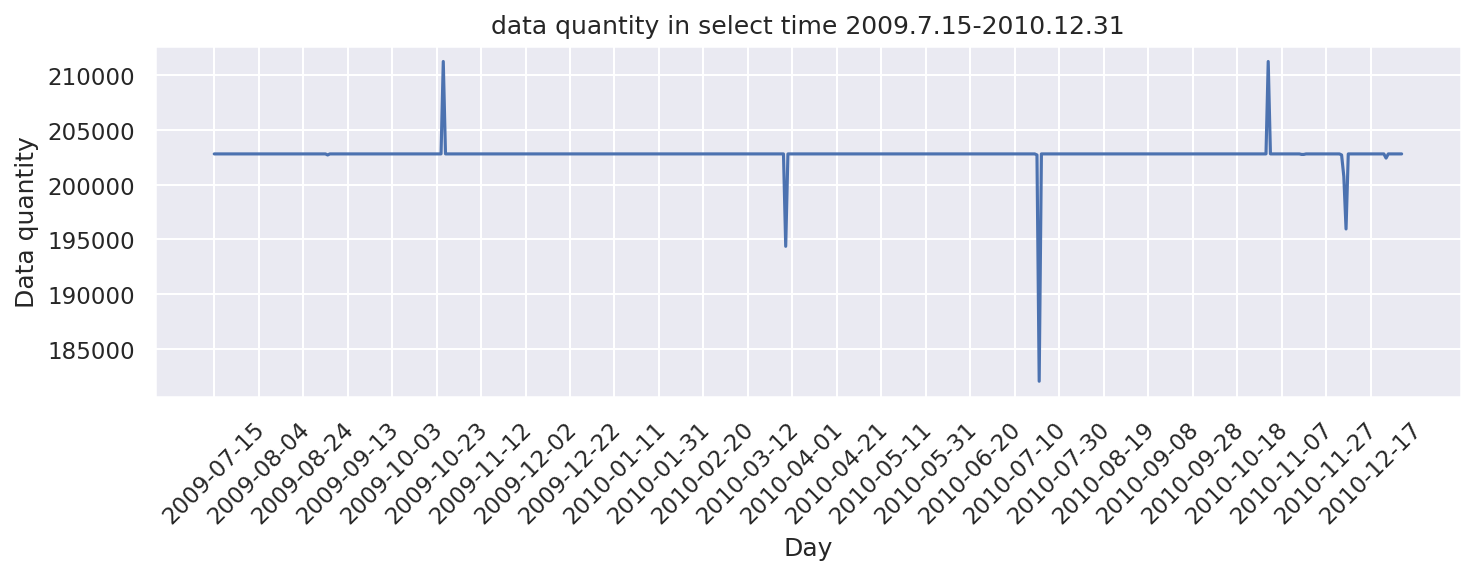

In [20]:
load_data = data_cleaning_select_time(load_data,19501,72948)
plot_day_data(load_data["Day"].value_counts().sort_index(), title="data quantity in select time 2009.7.15-2010.12.31", save=True)
print(load_data.shape)
data_20110101 = data_cleaning_select_time(load_data,73001,73048)

### drop more than 48 hours

before drop Time: (108475970, 5)
after drop Time:  (108459070, 5)
Saving figure drop data more than 48 hours a day
(108459070, 5)


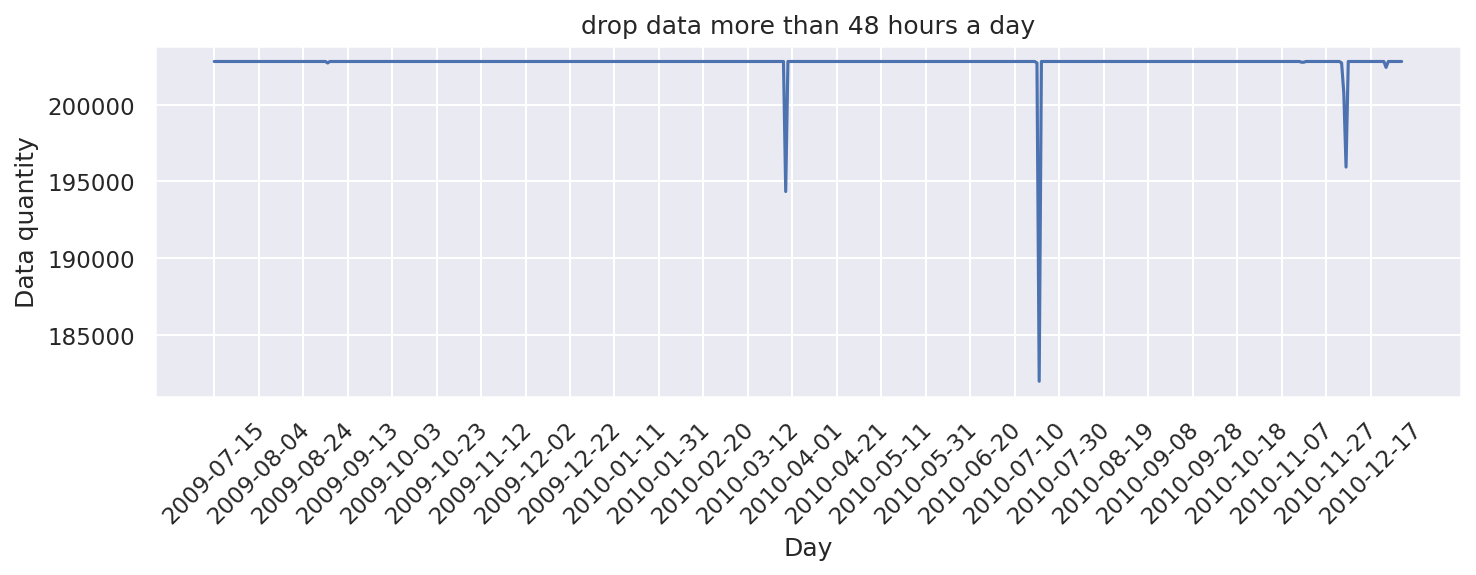

In [21]:
load_data = data_cleaning_drop_48(load_data)
plot_day_data(load_data["Day"].value_counts().sort_index(), title="drop data more than 48 hours a day", save=True)
print(load_data.shape)

### drop missing value

2010-12-24 202416 2010-12-05 200736 2010-12-06 195936 2010-03-29 194350 2010-07-21 182016

Saving figure drop data with day missing
(107483616, 5)


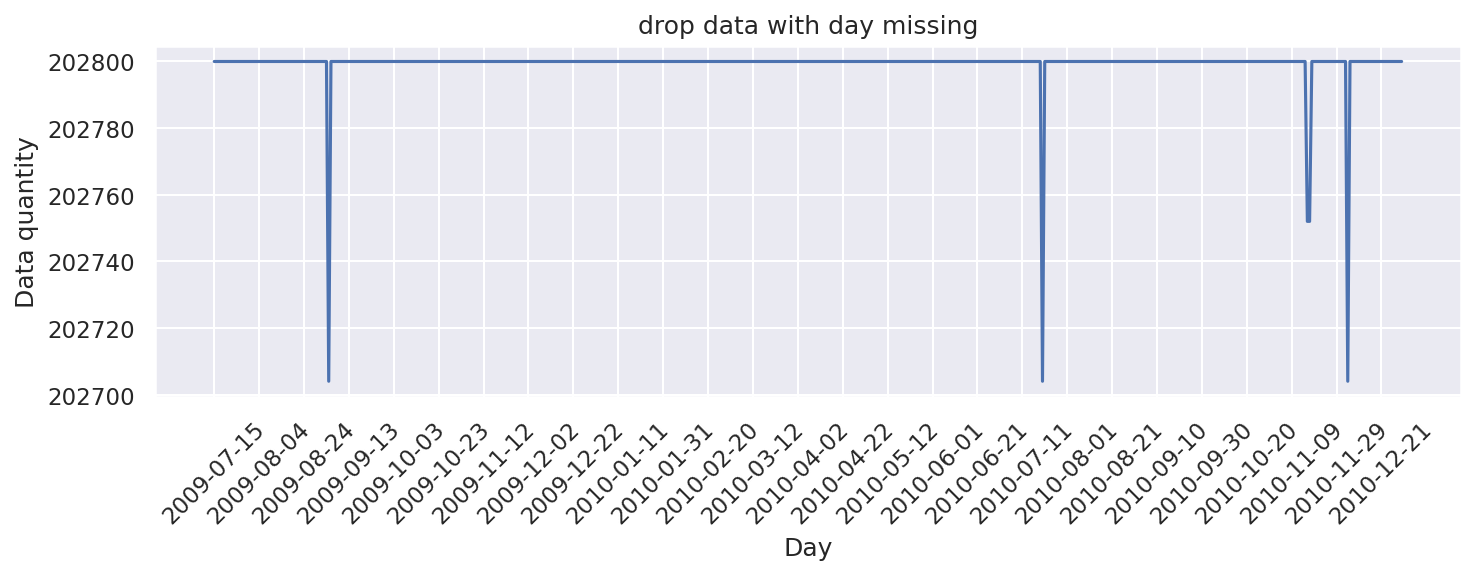

In [22]:
# drop data with day missing
drop_Day_missing = ["2010-03-29", "2010-12-24", "2010-12-05", "2010-12-06", "2010-07-21"]
load_data = drop_meter_from_df(load_data, "Day", drop_Day_missing)
plot_day_data(load_data["Day"].value_counts().sort_index(), title="drop data with day missing", save=True)
print(load_data.shape)

### replace missing value

2010-11-17 202752 2010-11-16 202752 2009-09-04 202704 2010-07-20 202704 2010-12-04 202704

In [23]:
print(set(load_data["MeterID"].unique()) - set(load_data[ load_data["Day"]=="2010-11-16"]["MeterID"].unique()))
print(set(load_data["MeterID"].unique()) - set(load_data[ load_data["Day"]=="2010-11-17"]["MeterID"].unique()))
print(set(load_data["MeterID"].unique()) - set(load_data[ load_data["Day"]=="2009-09-04"]["MeterID"].unique()))
print(set(load_data["MeterID"].unique()) - set(load_data[ load_data["Day"]=="2010-07-20"]["MeterID"].unique()))
print(set(load_data["MeterID"].unique()) - set(load_data[ load_data["Day"]=="2010-12-04"]["MeterID"].unique()))

{4463}
{4463}
{5313, 2715}
{3433, 5181}
{2728, 1505}


In [ ]:
load_data = replace_missing_value(load_data, 4463, "2010-11-15", "2010-11-16", 1)
load_data = replace_missing_value(load_data, 4463, "2010-11-14", "2010-11-17", 1)
load_data = replace_missing_value(load_data, 2715, "2009-09-03", "2009-09-04", 1)
load_data = replace_missing_value(load_data, 5313, "2009-09-03", "2009-09-04", 1)
load_data = replace_missing_value(load_data, 3433, "2010-07-19", "2010-07-20", 1)
load_data = replace_missing_value(load_data, 5181, "2010-07-19", "2010-07-20", 1)
load_data = replace_missing_value(load_data, 1505, "2010-12-03", "2010-12-04", 1)
load_data = replace_missing_value(load_data, 2728, "2010-12-03", "2010-12-04", 1)

Saving figure fill data with day missing
(107484000, 5)


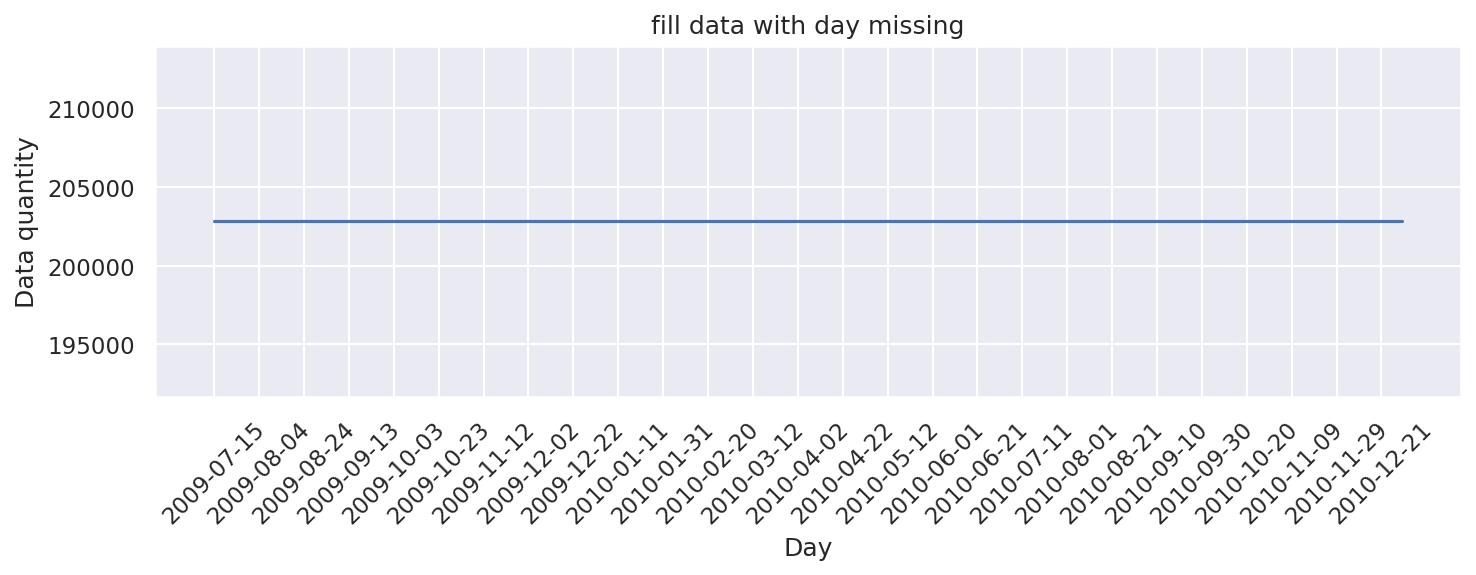

In [25]:
plot_day_data(load_data["Day"].value_counts().sort_index(), title="fill data with day missing", save=True)
print(load_data.shape)

In [26]:
load_data

,MeterID,Day,Time,Electricity,Datetime
221142,6000,2009-07-15,1,0.258,19501
221143,6000,2009-07-15,2,0.171,19502
221144,6000,2009-07-15,3,0.226,19503
221145,6000,2009-07-15,4,0.182,19504
221146,6000,2009-07-15,5,0.215,19505
...,...,...,...,...,...
23201743,2728,2010-12-04,44,0.789,70244
23201744,2728,2010-12-04,45,1.450,70245
23201745,2728,2010-12-04,46,0.807,70246
23201746,2728,2010-12-04,47,0.791,70247


In [27]:
e = load_data.to_csv(index=False)
f = open('CSV/load_data.csv','w')
f.write(e) #Give your csv text here.
## Python will convert \n to os.linesep
f.close()

#### clean up

In [28]:
del data
del d
del df_sme
del d_is_res
del res_list
del d_is_res_and_date
del res_data_list
gc.collect()

26917

# 2. FDI Simulation

## Meter grouping

In [173]:
load_data = pd.read_csv('CSV/load_data.csv', index_col=False, usecols=["MeterID","Day","Time","Electricity","Datetime"])

In [174]:
pretty_data = load_data.sort_values(by=['MeterID', 'Day'])

In [175]:
# FDI CONST
NUMBER_OF_DAYS = len(pretty_data["Day"].unique())
NUMBER_OF_HALF_HOURS = NUMBER_OF_DAYS * 48
AREA_NUM = 10
TOTAL_METER = len(pretty_data.groupby("MeterID")["MeterID"].unique())
METER_IN_RANGE = round(len(pretty_data.groupby("MeterID")["MeterID"].unique()) / AREA_NUM)

In [176]:
NUMBER_OF_DAYS, NUMBER_OF_HALF_HOURS, TOTAL_METER, METER_IN_RANGE

(530, 25440, 4225, 422)

In [177]:
# split data into 10 groups
data_group = split_data_to_group(pretty_data, AREA_NUM, METER_IN_RANGE, NUMBER_OF_HALF_HOURS, TOTAL_METER)

In [178]:
data_part = { your_key: data_group[your_key] for your_key in [0] }

## FDI
#### Have some bug in setting random seed. It will generate diffferent FDI data everytime. 

In [179]:
TOTAL_METER, AREA_NUM, NUMBER_OF_DAYS, METER_IN_RANGE

(4225, 10, 530, 422)

In [180]:
%run module_fdi_generator.ipynb

In [ ]:
FDI = FdiGenerator()
final_data_group = fdi_attack(data_group, total_meter=TOTAL_METER, area_num=AREA_NUM, total_day=NUMBER_OF_DAYS, group_meter=METER_IN_RANGE, ntl_meter_ratio=0.1, ntl_day_ratio=0.5)

start iterate 10 area
start split meter in area  0
[145 335 175 371 418  73 132 137  30  72  70  94 370  90 327 414   9 247
 196 231 192 239 349 228  55 355  56 297 271  79 411 116 208 194 364 184
 218  39 168 262  75  76]


  0%|          | 0/42 [00:00<?, ?it/s]

start split meter in area  1
[145 335 175 371 418  73 132 137  30  72  70  94 370  90 327 414   9 247
 196 231 192 239 349 228  55 355  56 297 271  79 411 116 208 194 364 184
 218  39 168 262  75  76]


  0%|          | 0/42 [00:00<?, ?it/s]

start split meter in area  2
[145 335 175 371 418  73 132 137  30  72  70  94 370  90 327 414   9 247
 196 231 192 239 349 228  55 355  56 297 271  79 411 116 208 194 364 184
 218  39 168 262  75  76]


  0%|          | 0/42 [00:00<?, ?it/s]

start split meter in area  3
[145 335 175 371 418  73 132 137  30  72  70  94 370  90 327 414   9 247
 196 231 192 239 349 228  55 355  56 297 271  79 411 116 208 194 364 184
 218  39 168 262  75  76]


  0%|          | 0/42 [00:00<?, ?it/s]

start split meter in area  4
[145 335 175 371 418  73 132 137  30  72  70  94 370  90 327 414   9 247
 196 231 192 239 349 228  55 355  56 297 271  79 411 116 208 194 364 184
 218  39 168 262  75  76]


  0%|          | 0/42 [00:00<?, ?it/s]

start split meter in area  5
[145 335 175 371 418  73 132 137  30  72  70  94 370  90 327 414   9 247
 196 231 192 239 349 228  55 355  56 297 271  79 411 116 208 194 364 184
 218  39 168 262  75  76]


  0%|          | 0/42 [00:00<?, ?it/s]

start split meter in area  6
[145 335 175 371 418  73 132 137  30  72  70  94 370  90 327 414   9 247
 196 231 192 239 349 228  55 355  56 297 271  79 411 116 208 194 364 184
 218  39 168 262  75  76]


  0%|          | 0/42 [00:00<?, ?it/s]

start split meter in area  7
[145 335 175 371 418  73 132 137  30  72  70  94 370  90 327 414   9 247
 196 231 192 239 349 228  55 355  56 297 271  79 411 116 208 194 364 184
 218  39 168 262  75  76]


  0%|          | 0/42 [00:00<?, ?it/s]

start split meter in area  8
[145 335 175 371 418  73 132 137  30  72  70  94 370  90 327 414   9 247
 196 231 192 239 349 228  55 355  56 297 271  79 411 116 208 194 364 184
 218  39 168 262  75  76]


  0%|          | 0/42 [00:00<?, ?it/s]

start split meter in area  9
[419  75 177  30 358 271 155 152 165 175 409  70 196 416  39 141 350  72
   9 402 297 220 373  55 140 194 145 386 277 367 126 250 331  93 422  77
 208 351 318 423 225 148]


  0%|          | 0/42 [00:00<?, ?it/s]

In [154]:
final_data_group[0].head()

,MeterID,Day,Time,Electricity,Datetime,FDI,Atk_Elec,FDI_method
74411712,1002,2009-07-15,1,0.362,19501,False,0.362,0
74411713,1002,2009-07-15,2,0.064,19502,False,0.064,0
74411714,1002,2009-07-15,3,0.119,19503,False,0.119,0
74411715,1002,2009-07-15,4,0.023,19504,False,0.023,0
74411716,1002,2009-07-15,5,0.140,19505,False,0.140,0


In [170]:
sum(final_data_group[0].iloc[145*530*48:(145+1)*530*48].groupby('MeterID')['FDI_method'].value_counts().to_numpy()/48)

530.0

In [155]:
a = [145, 335, 175, 371, 418, 73]
for m in a:
    print(final_data_group[0].iloc[m*530*48:(m+1)*530*48]['FDI'].value_counts())
    print()

False    12720
True     12720
Name: FDI, dtype: int64

False    12720
True     12720
Name: FDI, dtype: int64

False    12720
True     12720
Name: FDI, dtype: int64

False    12720
True     12720
Name: FDI, dtype: int64

False    12720
True     12720
Name: FDI, dtype: int64

False    12720
True     12720
Name: FDI, dtype: int64



In [87]:
final_data_group[0].groupby(['MeterID'])['FDI'].value_counts()

MeterID  FDI  
1002     False    25440
1003     False    25440
1004     False    25440
1005     False    25440
1006     False    25440
1008     False    25440
1009     False    25440
1013     False    25440
1014     False    25440
1015     False    12720
         True     12720
1016     False    25440
1018     False    25440
1020     False    25440
1022     False    25440
1024     False    25440
1025     False    25440
1027     False    25440
1030     False    25440
1033     False    25440
1034     False    25440
1035     False    25440
1036     False    25440
1037     False    25440
1039     False    25440
1041     False    25440
1042     False    25440
1044     False    25440
1045     False    25440
1047     False    25440
1052     False    25440
1053     False    12720
         True     12720
1054     False    25440
1055     False    25440
1057     False    25440
1058     False    25440
1059     False    25440
1060     False    25440
1061     False    25440
1062     False    25440
1

In [120]:
final_data_group[0].iloc[:48*3]['FDI'].value_counts()

False    144
Name: FDI, dtype: int64

In [88]:
final_data_group[0][final_data_group[0]['FDI']==True]['MeterID'].value_counts()

1539    12720
1338    12720
1227    12720
1236    12720
1273    12720
1281    12720
1296    12720
1312    12720
1316    12720
1319    12720
1350    12720
1559    12720
1365    12720
1371    12720
1382    12720
1399    12720
1428    12720
1441    12720
1485    12720
1015    12720
1219    12720
1184    12720
1666    12720
1152    12720
1053    12720
1569    12720
1064    12720
1584    12720
1592    12720
1594    12720
1083    12720
1084    12720
1109    12720
1112    12720
1115    12720
1120    12720
1121    12720
1124    12720
1143    12720
1656    12720
1660    12720
1530    12720
Name: MeterID, dtype: int64

In [ ]:
type(final_data_group), type(data_group), type(origin_data_group)

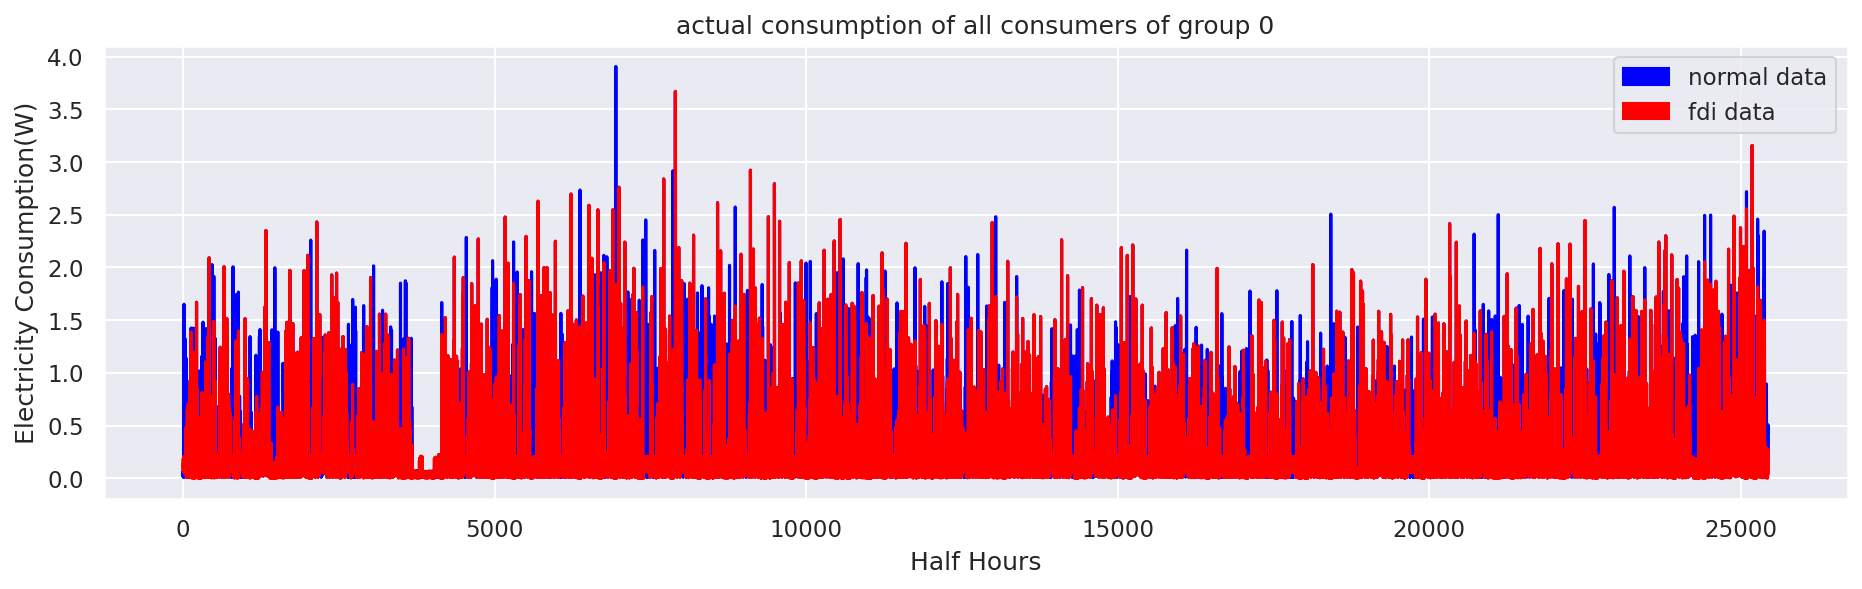

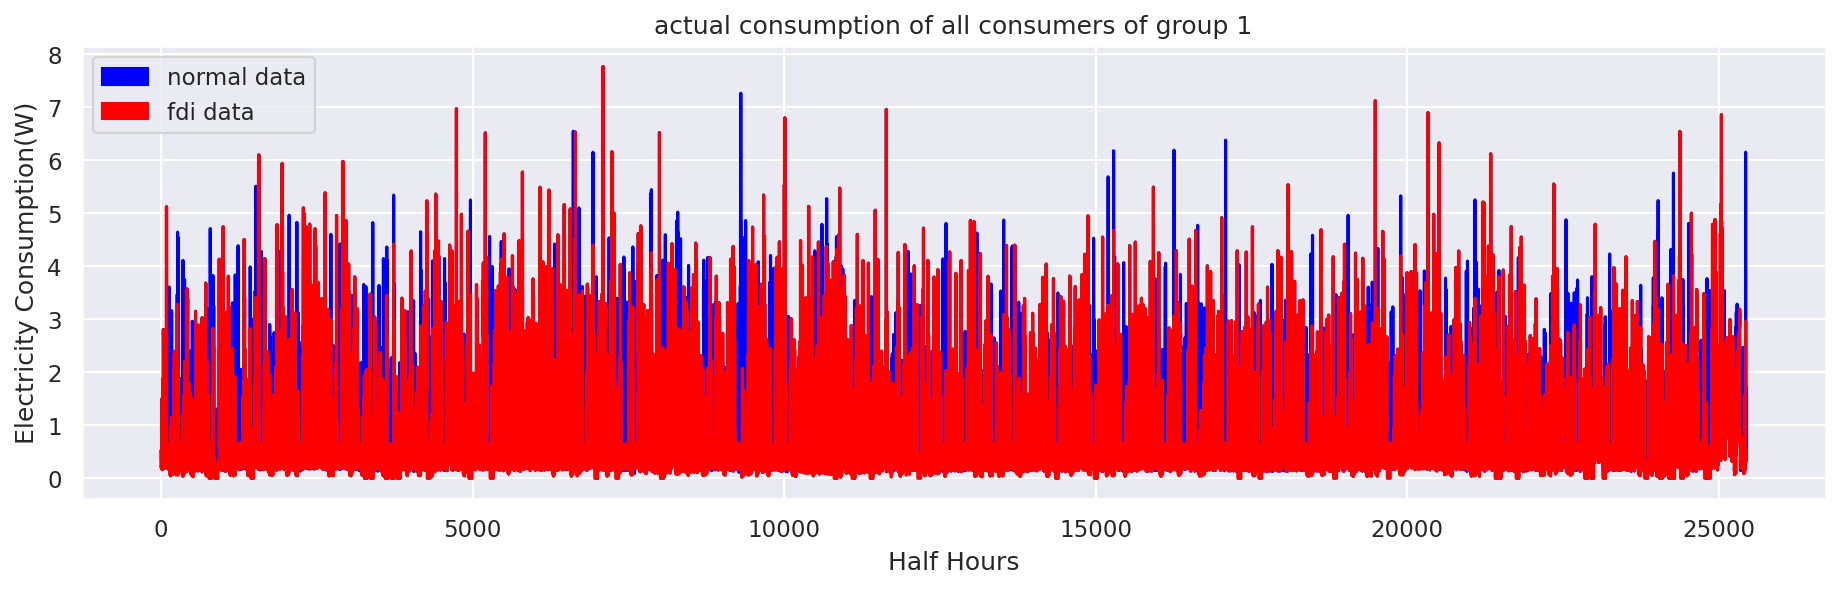

In [11]:
for i in range(len(final_data_group)):
    if i == 2: break
    plot_data(origin_data_group[i]["fdi"], final_data_group[i]["fdi"], "actual consumption of all consumers of group " + str(i), "normal data", "fdi data", plot_house=1, plot_hour=NUMBER_OF_HALF_HOURS, save=False)

## Check NTL

In [99]:
# observe_meter_data_group = copy.deepcopy(origin_data_group) ## data without fdi
# smart_meter_data_group = copy.deepcopy(final_data_group) ## data with fdi
observe_meter_data_group = origin_data_group ## data without fdi
smart_meter_data_group = final_data_group ## data with fdi

In [ ]:
# calculate NTL loss vector for every day
ntl_loss_data_group = []
for observe_area, smart_area in zip(observe_meter_data_group, smart_meter_data_group): # iterate 10 area
    ntl_loss_data = []
    for observe_meter, smart_meter in zip(observe_area['fdi'], smart_area['fdi']): #iterate fdi meter in each area
        
        sub = observe_meter[["Electricity"]] - smart_meter[["Electricity"]]

        ntl_loss_data = sub.to_numpy().reshape(NUMBER_OF_DAYS, 48) 

    ntl_loss_data_group.append(ntl_loss_data)
ntl_loss_data_group = np.asarray(ntl_loss_data_group)
ntl_loss_data_group.shape

In [ ]:
# make sure there is difference between the observe_meter_data_group and smart_meter_data_group
plt.plot(observe_meter_data_group[0]["fdi"][0]["Electricity"].tolist())
plt.plot(smart_meter_data_group[0]["fdi"][0]["Electricity"].tolist()) 
for j in range(1):
    t = observe_meter_data_group[0]["fdi"][j]["Electricity"] - smart_meter_data_group[0]["fdi"][j]["Electricity"]
    print(t.value_counts())

In [19]:
print(type(smart_meter_data_group[0]["normal"]))
len(smart_meter_data_group[1]["normal"])

<class 'list'>


380

### write observe meter data

In [64]:
# smart meter to csv
observe_meter_list = []
observe_meter_df = pd.DataFrame(columns=['MeterID', 'Day', 'FDI','Electricity'])
pbar = tqdm(observe_meter_data_group) 
for area in pbar: # iterate 10 data groups
    for meter in area['fdi']: # iterate every fdi meter in area 
        meter['FDI']='True'
        observe_meter_list.append(meter.to_numpy())
    for meter in area['normal']:
        meter['FDI']='False'
        observe_meter_list.append(meter.to_numpy())
#             se = {'MeterID': meter_id, 'Day': meter_day,'FDI':True }
#             v_value_list.append(se)

  0%|          | 0/10 [00:00<?, ?it/s]

In [65]:
# uncomment the code below to save preprocessed data into smart_meter.csv file.
df = pd.DataFrame(np.array(observe_meter_list).reshape(-1, 6), columns=["MeterID","Day","Time","Electricity","Datetime", "FDI"])
df.head()
df = df[["MeterID","Day","Time","Electricity","FDI"]]
e = df.to_csv(index=False)
f = open('CSV/observe_meter.csv','w')
f.write(e) #Give your csv text here.
f.close()

### write smart meter data

In [110]:
# smart meter to csv
smart_meter_list = []
smart_meter_df = pd.DataFrame(columns=['MeterID', 'Day', 'FDI','Electricity'])
pbar = tqdm(smart_meter_data_group) 
for area, data in enumerate(pbar): # iterate 10 data groups
    df = data[["MeterID","Day","Time","Electricity","FDI"]]
    e = df.to_csv(index=False)
    f = open('CSV/smartmeter/smart_meter_'+str(area)+'.csv','w')
    f.write(e) #Give your csv text here.
    f.close()
    

  0%|          | 0/10 [00:00<?, ?it/s]

0
1
2
3
4
5
6
7
8
9


In [109]:
len(pbar)

10

In [16]:
# uncomment the code below to save preprocessed data into smart_meter.csv file.
df = pd.DataFrame(np.array(smart_meter_list).reshape(-1, 6), columns=["MeterID","Day","Time","Electricity","Datetime", "FDI"])
df.head()
df = df[["MeterID","Day","Time","Electricity","FDI"]]
e = df.to_csv(index=False)
f = open('CSV/smartmeter/smart_meter.csv','w')
f.write(e) #Give your csv text here.
f.close()

# 3. Featrue extraction

### read smart meter data

In [11]:
s = pd.read_csv("CSV/load_data.csv")
s.shape

(13628291, 5)

In [13]:
d = pd.read_csv("CSV/smart_meter.csv")
d.shape

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1250085, 5)

In [12]:
s.tail()

,MeterID,Day,Time,Electricity,Datetime
13628286,5833,2010-07-26,31.0,0.276,57131.0
13628287,5833,2010-07-26,32.0,0.273,57132.0
13628288,5833,2010-07-26,33.0,0.290,57133.0
13628289,5833,2010-07-26,34.0,0.461,57134.0
13628290,5833,NaN,NaN,NaN,NaN


In [7]:
smart_meter_data_group = read_smart_meter_csv()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


ValueError: cannot reshape array of size 68083050 into shape (530,48,5)

In [6]:
for i in smart_meter_data_group[0]['normal'][:3]:
    print(i['Electricity'].max())

9.741
7.651
6.23


## V-Value

### Normalization

In [29]:
# the value of x is divided by its
# maximum and scaled into a value between zero and one
# normalized smart_meter_data_group by divide the max eletricity of the meter
for area in smart_meter_data_group:
    for meter in area['fdi']:
        meter_numpy = meter['Electricity'].to_numpy()
        meter['Electricity'] = meter_numpy / meter_numpy.max()
    for meter in area['normal']:
        meter_numpy = meter['Electricity'].to_numpy()
        meter['Electricity'] = meter_numpy / meter_numpy.max()
smart_meter_data_group[0]['fdi'][0]['Electricity'].to_numpy()

array([0.03654133667327904, 0.03531269191667239, 0.030966420614507387,
       ..., 0.04361966398335228, 0.03120148357601003,
       0.011117897020210493], dtype=object)

Series([], Name: Electricity, dtype: int64)


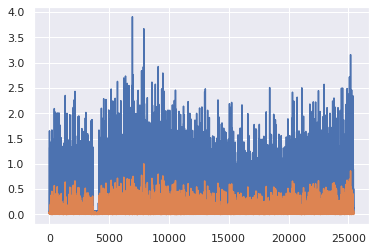

In [30]:
# make sure there is difference between the observe_meter_data_group and smart_meter_data_group
plt.plot(observe_meter_data_group[0]["fdi"][0]["Electricity"].tolist())
plt.plot(smart_meter_data_group[0]["fdi"][0]["Electricity"].tolist()) 
for j in range(1):
    t = observe_meter_data_group[0]["fdi"][j]["Electricity"] - smart_meter_data_group[0]["fdi"][j]["Electricity"]
    print(t.value_counts())

### calculate v-value

In [39]:
v_value_list = v_value(smart_meter_data_group, NUMBER_OF_DAYS)

  0%|          | 0/10 [00:00<?, ?it/s]

finish fdi
finish normal
finish fdi
finish normal
finish fdi
finish normal
finish fdi
finish normal
finish fdi
finish normal
finish fdi
finish normal
finish fdi
finish normal
finish fdi
finish normal
finish fdi
finish normal
finish fdi
finish normal


In [40]:
df = pd.DataFrame(v_value_list)
df.head()

,MeterID,Day,FDI,Tmax1,Tmax2,Tmin1,Cmax1,Cmax2,Cmin1
0,1236,2009-07-15,True,12,30,15,0.205161,0.209875,0.059876
1,1236,2009-07-16,True,20,34,24,0.656000,0.706000,0.012000
2,1236,2009-07-17,True,18,35,24,0.925000,1.387000,0.020000
3,1236,2009-07-18,True,0,35,0,0.000000,1.198190,0.000000
4,1236,2009-07-19,True,25,36,29,1.669000,0.850000,0.090000


In [41]:
e = df.to_csv(index=False)
f = open('CSV/v_value.csv','w')
f.write(e) #Give your csv text here.
## Python will convert \n to os.linesep
f.close()

In [ ]:
for i in df.columns:
    print(f"{'-'*5} {i} {'-'*5}")
    print(df[i].value_counts())

In [ ]:
del meter_day
del meter_id
del meter_numpy
del e
del f
del df
gc.collect()

##  four time interval

1) Time Period 1: 10.30 P.M.–6.30 A.M.—overnight period (45:14) 17  
2) Time Period 2: 6.30–9.00 A.M.—breakfast period (14:18) 4  
3) Time Period 3: 9.00 A.M.–3.30 P.M.—daytime period (18:31) 14   
4) Time Period 4: 3.30–10.30 P.M.—evening period.(31:45) 14

In [35]:
four_time_list = four_time(smart_meter_data_group, NUMBER_OF_DAYS)

  0%|          | 0/10 [00:00<?, ?it/s]

1


In [36]:
df = pd.DataFrame(four_time_list)
df.head(), df.shape

(   MeterID         Day   FDI  overnight  breakfast   daytime   evening
 0     1236  2009-07-15  True   0.128520    0.06780  0.120048  0.119347
 1     1236  2009-07-16  True   0.084015    0.23875  0.201571  0.196692
 2     1236  2009-07-17  True   0.135647    0.17500  0.231000  0.408409
 3     1236  2009-07-18  True   0.083588    0.00000  0.000000  0.092168
 4     1236  2009-07-19  True   0.029882    0.24775  0.295500  0.250308,
 (223660, 7))

In [37]:
e = df.to_csv(index=False)
f = open('CSV/four_time.csv','w')
f.write(e) #Give your csv text here.
f.close()

In [38]:
temp = pd.read_csv('CSV/four_time.csv')
temp.shape

(223660, 7)

## TS barycenter

### Generate file below

one_cluster_softdtw_barycenter_24hours  
one_cluster_euclidean_barycenter_48hours  
one_cluster_dba_barycenter_48   
one_cluster_sdtw_barycenter_48  

In [ ]:
global center

def km_cluster(train_data, cluster_num, method="EU"):
    if method == "EU":
        eu_km = TimeSeriesKMeans(n_clusters=cluster_num, verbose=False, random_state=42)
        y_pred = eu_km.fit_predict(train_data)
        result = eu_km

    elif method == "DBA":
        dba_km = TimeSeriesKMeans(n_clusters=cluster_num,
                              n_init=2,
                              metric="dtw",
                              verbose=False,
                              max_iter_barycenter=10,
                              random_state=42)

        y_pred = dba_km.fit_predict(train_data)
        result = dba_km

    
    elif method == "Soft-DTW":
        sdtw_km = TimeSeriesKMeans(n_clusters=cluster_num,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True  ,
                           random_state=42,
                            n_jobs=-1)
        y_pred = sdtw_km.fit_predict(train_data)
        result = sdtw_km
        
    plt.figure(dpi=80, figsize=(15,4))
    for yi in range(cluster_num):
        plt.subplot(2, 3, yi+1)
        for xx in train_data[y_pred == yi]:
            plt.plot(xx.ravel(), "k-", alpha=.2)
            if method == "EU":
                plt.plot(eu_km.cluster_centers_[yi].ravel(), "r-")
            elif method == "DBA":
                plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
            elif method == "Soft-DTW":
                plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
                
        plt.xlim(0, train_data.shape[0])
    #     plt.ylim(-4, 4)
        plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
                 transform=plt.gca().transAxes)
        if yi == 1:
            plt.title(method+"$k$-means")
    plt.show()
            
    return y_pred, result

### barycenter sdtw 24

In [ ]:
SDTW_result = {}
method = "Soft-DTW"
# barycenter_df = pd.DataFrame(columns=['MeterID', 'Day', 'FDI', 'overnight', 'breakfast', 'daytime', 'evening'])
pbar = tqdm(smart_meter_data_group)
count = 1
for area in pbar: # iterate 10 data groups
    X = []
    Y = []
    for meter in area['fdi']: # iterate every fdi meter in area 
        X.append(meter["Electricity"].to_numpy())
        Y.append((meter["MeterID"].max(), 'True'))
    for meter in area['normal']: # iterate every fdi meter in area 
        X.append(meter["Electricity"].to_numpy())
        Y.append((meter["MeterID"].max(), 'False'))
    X = np.array(X)
    Y = np.array(Y)
    X = X.reshape(-1, 530, 48 )
    print(X.shape)
    y_pred, result = km_cluster(X, 1, method)
    SDTW_result[count] = (y_pred, result, result.cluster_centers_, Y)
    count = count + 1

In [ ]:
#save model
one_cluster_sdtw_barycenter = []
for i in range(len(SDTW_result)):
    i = i + 1
    one_cluster_sdtw_barycenter.append(SDTW_result[i][2])
df = pd.DataFrame(one_cluster_sdtw_barycenter[0].reshape(-1, 24))
df.head(), df.shape
e = df.to_csv(index=False)
f = open('one_cluster_softdtw_barycenter_24hours.csv','w')
f.write(e) #Give your csv text here.
f.close()

### barycenter euclidean 48

In [ ]:
euclidean_barycenter_result = {}
pbar = tqdm(smart_meter_data_group)
count = 1
for area in pbar: # iterate 10 data groups
    print(f'start {count}')
    X = []
    Y = []
    for meter in area['fdi']: # iterate every fdi meter in area 
        X.append(meter["Electricity"].to_numpy())
        Y.append((meter["MeterID"].max(), 'True'))
    for meter in area['normal']: # iterate every fdi meter in area 
        X.append(meter["Electricity"].to_numpy())
        Y.append((meter["MeterID"].max(), 'False'))
    X = np.array(X)
    print(X.shape)
    Y = np.array(Y)
    X = X.reshape(-1, 530, 48 )
    print(X.shape)
    result = euclidean_barycenter(X)
    euclidean_barycenter_result[count] = (result, Y)
    count = count + 1
    
one_cluster_euclidean_barycenter_48 = []
for i in range(len(euclidean_barycenter_result)):
    i = i + 1
    one_cluster_euclidean_barycenter_48.append(euclidean_barycenter_result[i][0])

In [ ]:
df = pd.DataFrame(np.array(one_cluster_euclidean_barycenter_48).reshape(10, 530*48))
df.shape

In [ ]:
e = df.to_csv(index=False)
f = open('one_cluster_euclidean_barycenter_48hours.csv','w')
f.write(e) #Give your csv text here.
f.close()

#### barycenter euclidean 48 training

In [ ]:
for i in one_cluster_euclidean_barycenter_48[1]:
    plt.plot(i)

In [ ]:
def calc_stuff(x,y):   # these are examples.
    meter_euclid = np.linalg.norm(x-y)
    meter_dtw = dtw(x,y)
    meter_sdtw = soft_dtw(x,y)
    return meter_euclid, meter_dtw, meter_sdtw

def procedure(j):                 # just factoring out the
    df_list = []
    d = j.reshape(-1, 5)
    meter = pd.DataFrame(d, columns=["MeterID","Day","Time","Electricity","FDI"])
    day_list = meter['Day'].reset_index()
    for i in range(530): # 
        
        meter_id = meter["MeterID"].loc[0]
        meter_day = day_list['Day'][i*48]
        meter_fdi = meter["FDI"].loc[0]
        x = meter["Electricity"].to_numpy()[i*48:(i+1)*48]
        y = center[i*48:(i+1)*48]
#         if i == 529:
#             print(f'meter_id : {meter_id} , x.shape :{ x.shape}, y.shape: {y.shape},{i*48,(i+1)*48}')
        meter_euclid, meter_dtw, meter_sdtw = calc_stuff(x,y)
        se = {'MeterID': meter_id, 'Day': meter_day,'FDI': meter_fdi, "meter_euclid": meter_euclid, "meter_dtw":meter_dtw, "meter_sdtw":meter_sdtw}
        df_list.append(se)
    return df_list

def main(PoolExecutor, area_num): # take ProcessPoolExecutor or ThreadPoolExecutor
    
    inputs = data_group[area_num] # data_group[0] 有422個
    output1 = list()

    start = time()           # let's see how long this takes
    
    with PoolExecutor() as executor:
        for out1 in executor.map(procedure, inputs):
            # put results into correct output list:
            output1.append(out1)
            
    finish = time()
    print(f'PoolExecutor: {PoolExecutor}')
    print(f'time : {(finish-start)}')
    return output1

In [ ]:
center_euclid_48 = pd.read_csv('one_cluster_euclidean_barycenter_48hours.csv')
center_euclid_48.shape

In [ ]:
euclid_day_score_list = []
for num in range(10):
    print(f'start area {num}')
    center = center_euclid_48.loc[num].to_numpy()
    sdtwa = main(ProcessPoolExecutor, num)
    euclid_day_score_list.append(sdtwa)

In [ ]:
score_list = []
area_count = 0
meter_count = 0
day_count = 0

for index, area in enumerate(euclid_day_score_list): # area=10
    area_count += 1
    for meter in area: #meter=422(427)
        meter_count += 1
        for day in meter:
            day_count +=1
            score_list.append(day)
area_count, meter_count, day_count

In [ ]:
euclid_day_score_df = pd.DataFrame(score_list)
df = euclid_day_score_df
X = df[["meter_euclid"]]
Y = df[["FDI"]]

partition = 422*8*530
evaluation = 422*1*530
total = 2239250


X_train = X[:partition]
X_val = X[partition:total-evaluation]
X_test = X[total-evaluation: total]
y_train = Y[:partition]
y_val = Y[partition:total-evaluation]
y_test = Y[total-evaluation: total]

In [ ]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

In [ ]:
model = XGBClassifier()
# define grid
weights = [0.01, 0.1, 1, 10, 25, 50, 75, 99, 100, 1000, 116,  10.7]
param_grid = dict(scale_pos_weight=weights)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X_train, y_train, verbose=True)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

### barycenter dba 48

In [42]:
# calculate center
dba_barycenter_result = {}
pbar = tqdm(smart_meter_data_group)
count = 1
for area in pbar: # iterate 10 data groups
    print(f'start {count}')
    X = []
    Y = []
    for meter in area['fdi']: # iterate every fdi meter in area 
        X.append(meter["Electricity"].to_numpy())
        Y.append((meter["MeterID"].max(), 'True'))
    for meter in area['normal']: # iterate every fdi meter in area 
        X.append(meter["Electricity"].to_numpy())
        Y.append((meter["MeterID"].max(), 'False'))
    X = np.array(X)
    print(X.shape)
    Y = np.array(Y)
    X = X.reshape(-1, 530, 48 )
    print(X.shape)
    result = dtw_barycenter_averaging_subgradient(X, max_iter=20, tol=1e-3)
    dba_barycenter_result[count] = (result, Y)
    count = count + 1
    
one_cluster_dba_barycenter_48 = []
for i in range(len(dba_barycenter_result)):
    i = i + 1
    one_cluster_dba_barycenter_48.append(dba_barycenter_result[i][0])
print(one_cluster_dba_barycenter_48[9].shape)

  0%|          | 0/10 [00:00<?, ?it/s]

start 1
(422, 25440)
(422, 530, 48)


KeyboardInterrupt: 

In [ ]:
for i in one_cluster_dba_barycenter_48[0][:10]:
    plt.plot(i)
#     break

In [ ]:
# df = pd.DataFrame(np.array(one_cluster_dba_barycenter_48).reshape(10, 530*48))
# print(df.shape)
# e = df.to_csv(index=False)
# f = open('one_cluster_dba_barycenter_48.csv','w')
# f.write(e) #Give your csv text here.
# f.close()

#### barycenter dba 48 training

In [ ]:
def calc_stuff(x,y):   # these are examples.
    meter_euclid = np.linalg.norm(x-y)
    meter_dtw = dtw(x,y)
    meter_sdtw = soft_dtw(x,y)
    return meter_euclid, meter_dtw, meter_sdtw

def procedure(j):                 # just factoring out the
    df_list = []
    d = j.reshape(-1, 5)
    meter = pd.DataFrame(d, columns=["MeterID","Day","Time","Electricity","FDI"])
    day_list = meter['Day'].reset_index()
    for i in range(530): # 
        
        meter_id = meter["MeterID"].loc[0]
        meter_day = day_list['Day'][i*48]
        meter_fdi = meter["FDI"].loc[0]
        x = meter["Electricity"].to_numpy()[i*48:(i+1)*48]
        y = center[i*48:(i+1)*48]
#         if i == 529:
#             print(f'meter_id : {meter_id} , x.shape :{ x.shape}, y.shape: {y.shape},{i*48,(i+1)*48}')
        meter_euclid, meter_dtw, meter_sdtw = calc_stuff(x,y)
        se = {'MeterID': meter_id, 'Day': meter_day,'FDI': meter_fdi, "meter_euclid": meter_euclid, "meter_dtw":meter_dtw, "meter_sdtw":meter_sdtw}
        df_list.append(se)
    return df_list

def main(PoolExecutor, area_num): # take ProcessPoolExecutor or ThreadPoolExecutor
    
    inputs = data_group[area_num] # data_group[0] 有422個
    output1 = list()

    start = time()           # let's see how long this takes
    
    with PoolExecutor() as executor:
        for out1 in executor.map(procedure, inputs):
            # put results into correct output list:
            output1.append(out1)
            
    finish = time()
    print(f'PoolExecutor: {PoolExecutor}')
    print(f'time : {(finish-start)}')
    return output1

In [ ]:
center_dba_48 = pd.read_csv('one_cluster_dba_barycenter_48.csv')
center_dba_48.shape

In [ ]:
dba_day_score_list = []
for num in range(10):
    print(f'start area {num}')
    center = center_dba_48.loc[num].to_numpy()
    sdtwa = main(ProcessPoolExecutor, num)
    dba_day_score_list.append(sdtwa)

In [ ]:
# combime score list
score_list = []
area_count = 0
meter_count = 0
day_count = 0
dba_day_score_df = pd.DataFrame(columns=["MeterID", "Day", "FDI", "meter_dtw", "meter_sdtw"])
for index, area in enumerate(dba_day_score_list): # area=10
    area_count += 1
    for meter in area: #meter=422(427)
        meter_count += 1
        for day in meter:
            day_count +=1
            score_list.append(day)
area_count, meter_count, day_count

In [ ]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

In [ ]:
dba_day_score_df = pd.DataFrame(score_list)
df = dba_day_score_df
X = df[["meter_dtw"]]
Y = df[["FDI"]]

partition = 422*8*530
evaluation = 422*1*530
total = 2239250


X_train = X[:partition]
X_val = X[partition:total-evaluation]
X_test = X[total-evaluation: total]
y_train = Y[:partition]
y_val = Y[partition:total-evaluation]
y_test = Y[total-evaluation: total]

model = XGBClassifier()
# define grid
weights = [0.01, 0.1, 1, 10, 25, 50, 75, 99, 100, 1000, 116,  10.7]
param_grid = dict(scale_pos_weight=weights)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X_train, y_train, verbose=True)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

### barycenter sdtw 48

In [45]:
barycenter_result = {}
pbar = tqdm(smart_meter_data_group)
count = 1
for area in pbar: # iterate 10 data groups
    print(f'start {count}')
    X = []
    Y = []
    for meter in area['fdi']: # iterate every fdi meter in area 
        X.append(meter["Electricity"].to_numpy())
        Y.append((meter["MeterID"].max(), 'True'))
    for meter in area['normal']: # iterate every fdi meter in area 
        X.append(meter["Electricity"].to_numpy())
        Y.append((meter["MeterID"].max(), 'False'))
    X = np.array(X)
    print(X.shape)
    Y = np.array(Y)
    X = X.reshape(-1, 530, 48 )
    print(X.shape)
    result = softdtw_barycenter(X, max_iter=5, gamma=1.)
    barycenter_result[count] = (result, Y)
    count = count + 1
one_cluster_sdtw_barycenter_48 = []
for i in range(len(barycenter_result)):
    i = i + 1
    one_cluster_sdtw_barycenter_48.append(barycenter_result[i][0])
one_cluster_sdtw_barycenter_48[0].shape

  0%|          | 0/10 [00:00<?, ?it/s]

start 1
(422, 25440)
(422, 530, 48)
start 2
(422, 25440)
(422, 530, 48)


KeyboardInterrupt: 

In [ ]:
for i in one_cluster_sdtw_barycenter_48[0]:
    plt.title("Every day's barycenter in first area")
    plt.xlabel("Half hours")
    plt.ylabel("Soft-dtw barycenter")
    plt.plot(i)
save_fig("Barycenter of each day in the first area")

In [ ]:
for i in one_cluster_sdtw_barycenter_48[0]:
    plt.plot(i)

In [ ]:
df = pd.DataFrame(np.array(one_cluster_sdtw_barycenter_48).reshape(10, 530*48))
df.shape

In [ ]:
e = df.to_csv(index=False)
f = open('one_cluster_sdtw_barycenter_48.csv','w')
f.write(e) #Give your csv text here.
f.close()

#### barycenter sdtw 48 training

In [ ]:
center_sdtw_48 = pd.read_csv('one_cluster_sdtw_barycenter_48.csv')
center_sdtw_48.shape

In [ ]:
sdtw_day_score_list = []
for num in range(10):
    print(f'start area {num}')
    center = center_sdtw_48.loc[num].to_numpy()
    sdtwa = main(ProcessPoolExecutor, num)
    sdtw_day_score_list.append(sdtwa)

In [ ]:
# combime score list
score_list = []
area_count = 0
meter_count = 0
day_count = 0
sdtw_day_score_list = pd.DataFrame(columns=["MeterID", "Day", "FDI", "meter_dtw", "meter_sdtw"])
for index, area in enumerate(sdtw_day_score_list): # area=10
    area_count += 1
    for meter in area: #meter=422(427)
        meter_count += 1
        for day in meter:
            day_count +=1
            score_list.append(day)
area_count, meter_count, day_count

In [ ]:
sdtw_day_score_list = pd.DataFrame(score_list)
df = sdtw_day_score_list
X = df[["meter_dtw"]]
Y = df[["FDI"]]

partition = 422*8*530
evaluation = 422*1*530
total = 2239250

print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

X_train = X[:partition]
X_val = X[partition:total-evaluation]
X_test = X[total-evaluation: total]
y_train = Y[:partition]
y_val = Y[partition:total-evaluation]
y_test = Y[total-evaluation: total]

model = XGBClassifier()
# define grid
weights = [0.01, 0.1, 1, 10, 25, 50, 75, 99, 100, 1000, 116,  10.7]
param_grid = dict(scale_pos_weight=weights)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X_train, y_train, verbose=True)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

### Final sdtw day score calculating

#### using 10 * 48 sdtw

In [7]:
center_sdtw = pd.read_csv('CSV/tsc/one_cluster_sdtw_barycenter.csv')
print(center_sdtw.shape)

smart_meter_df = pd.read_csv('CSV/smart_meter.csv')
print(smart_meter_df.shape)

(10, 48)
(107484000, 5)


In [8]:
n = np.array(smart_meter_df['Electricity'])
nr = n.reshape(-1, 530, 48, 1)
print("nr.shape: ", nr.shape)

data_group = {}
for i in range(10):
    if i == 9:
        data_group[i] = nr[4225-427: 4225].reshape(-1, 530, 48)
    else:
        data_group[i] = nr[i*422:(i+1)*422].reshape(-1, 530, 48)
print("data_group[0][0][0].shape: ", data_group[0][0][0].shape)
print(data_group[0].shape)

nr.shape:  (4225, 530, 48, 1)
data_group[0][0][0].shape:  (48,)
(422, 530, 48)


In [11]:
def calc_stuff(x,y):   # calc dtw and sdtw between x and y 
    meter_dtw = dtw(x,y)
    meter_sdtw = soft_dtw(x,y)
    return meter_dtw, meter_sdtw

def procedure(area_data):                 # just factoring out the
    df_list = []
    
    for i in range(530): # iterate every day for each user
        
        
        x = area_data[i]
        y = center
        print(y)
        meter_dtw, meter_sdtw = calc_stuff(x,y)
        se = {"meter_dtw":meter_dtw, "meter_sdtw":meter_sdtw}
        df_list.append(se)    
    return df_list

def main(PoolExecutor, area_num): # take ProcessPoolExecutor or ThreadPoolExecutor
    
    inputs = data_group[area_num] # data_group[0] 有422個
    output1 = list()

    start = time()           # let's see how long this takes
    
    with PoolExecutor() as executor:
        for out1 in executor.map(procedure, inputs): #iterate 422 users in each area
            # put results into correct output list:
            output1.append(out1)
            
    finish = time()
    print(f'PoolExecutor: {PoolExecutor}')
    print(f'time : {(finish-start)}')
    return output1

In [10]:
sdtw_day_score_list = []
for area in range(10): #iter 10 area
    print(f'start area {area}')
    center = center_sdtw.iloc[area].to_numpy()
    sdtw_temp = main(ProcessPoolExecutor, area)
    sdtw_day_score_list.append(sdtw_temp)

start area 0
[0.54657957 0.28922521 0.24800499 0.22420908 0.20933082 0.19997395
 0.19436095 0.19172163 0.19156306 0.19359103 0.19799834 0.20500539
 0.21484785 0.22765341 0.2430915  0.26068419 0.28014836 0.30021529
 0.3182198  0.33127211 0.3376995  0.33851627 0.33614842 0.33239407
 0.32873584 0.32582216 0.32295344 0.32082812 0.32087544 0.32415688
 0.33189268 0.34602787 0.37009989 0.41119512 0.48864445 0.69065013
 2.05741718 0.81716723 0.62444931 0.57292458 0.55044253 0.55128956
 0.56410809 0.58241957 0.59582272 0.58926679 0.56261874 0.54399193][0.54657957 0.28922521 0.24800499 0.22420908 0.20933082 0.19997395
 0.19436095 0.19172163 0.19156306 0.19359103 0.19799834 0.20500539
 0.21484785 0.22765341 0.2430915  0.26068419 0.28014836 0.30021529
 0.3182198  0.33127211 0.3376995  0.33851627 0.33614842 0.33239407
 0.32873584 0.32582216 0.32295344 0.32082812 0.32087544 0.32415688
 0.33189268 0.34602787 0.37009989 0.41119512 0.48864445 0.69065013
 2.05741718 0.81716723 0.62444931 0.57292458 0.55

In [37]:
sdtw_temp = []
for i in range(len(sdtw_day_score_list)):
    sdtw_temp.append(sdtw_day_score_list[i])

In [49]:
print(len(sdtw_day_score_list))
print(len(sdtw_day_score_list[0]))
print(len(sdtw_day_score_list[0][0]))
print(len(sdtw_day_score_list[0][0][0]))

10
422
530
2


In [50]:
score_list = []
area_count = 0
meter_count = 0
day_count = 0

for index, area in enumerate(sdtw_day_score_list): # area=10
    area_count += 1
    for meter in area: #meter=422(427)
        meter_count += 1
        for day in meter:
            day_count +=1
            score_list.append(day)
print(area_count, meter_count, day_count)

10 4225 2239250


In [52]:
sdtw_day_score_df = pd.DataFrame(score_list)
e = sdtw_day_score_df.to_csv(index=False)
f = open('tsc_dtw_sdtw_10*48.csv','w')
f.write(e) #Give your csv text here.
f.close()

#### using 10 * 530 * 48 sdtw

In [12]:
center_sdtw = pd.read_csv('CSV/tsc/one_cluster_sdtw_barycenter_48.csv')
print(center_sdtw.shape)

smart_meter_df = pd.read_csv('CSV/smart_meter.csv')
print(smart_meter_df.shape)

(10, 25440)
(107484000, 5)


In [13]:
n = np.array(smart_meter_df['Electricity'])
nr = n.reshape(-1, 530, 48, 1)
print("nr.shape: ", nr.shape)

nr.shape:  (4225, 530, 48, 1)


In [14]:
data_group = {}
for i in range(10):
    if i == 9:
        data_group[i] = nr[4225-427: 4225].reshape(-1, 530, 48)
    else:
        data_group[i] = nr[i*422:(i+1)*422].reshape(-1, 530, 48)
print("data_group[0][0][0].shape: ", data_group[0][0][0].shape)
print(data_group[0].shape)

data_group[0][0][0].shape:  (48,)
(422, 530, 48)


In [24]:
def calc_stuff(x,y):   # calc dtw and sdtw between x and y 
    meter_dtw = dtw(x,y)
    meter_sdtw = soft_dtw(x,y)
    return meter_dtw, meter_sdtw

def procedure(area_data):                 # just factoring out the
    df_list = []
    
    for i in range(530): # iterate every day for each user
        x = area_data[i]
        y = center[i*48:(i+1)*48]
        meter_dtw, meter_sdtw = calc_stuff(x,y)
        se = {"meter_dtw":meter_dtw, "meter_sdtw":meter_sdtw}
        df_list.append(se)    
    return df_list

def main(PoolExecutor, area_num): # take ProcessPoolExecutor or ThreadPoolExecutor
    
    inputs = data_group[area_num] # data_group[0] 有422個
    output1 = list()

    start = time()           # let's see how long this takes
    
    with PoolExecutor() as executor:
        for out1 in executor.map(procedure, inputs): #iterate 422 users in each area
            # put results into correct output list:
            output1.append(out1)
            
    finish = time()
    print(f'PoolExecutor: {PoolExecutor}')
    print(f'time : {(finish-start)}')
    return output1

In [26]:
sdtw_day_score_list = []
for area in range(10): #iter 10 area
    print(f'start area {area}')
    center = center_sdtw.iloc[area].to_numpy()
    sdtw_temp = main(ProcessPoolExecutor, area)
    sdtw_day_score_list.append(sdtw_temp)

start area 0
PoolExecutor: <class 'concurrent.futures.process.ProcessPoolExecutor'>
time : 8.396644115447998
start area 1
PoolExecutor: <class 'concurrent.futures.process.ProcessPoolExecutor'>
time : 8.371230363845825
start area 2
PoolExecutor: <class 'concurrent.futures.process.ProcessPoolExecutor'>
time : 8.73043704032898
start area 3
PoolExecutor: <class 'concurrent.futures.process.ProcessPoolExecutor'>
time : 8.860711336135864
start area 4
PoolExecutor: <class 'concurrent.futures.process.ProcessPoolExecutor'>
time : 8.803816556930542
start area 5
PoolExecutor: <class 'concurrent.futures.process.ProcessPoolExecutor'>
time : 8.81618881225586
start area 6
PoolExecutor: <class 'concurrent.futures.process.ProcessPoolExecutor'>
time : 8.781157970428467
start area 7
PoolExecutor: <class 'concurrent.futures.process.ProcessPoolExecutor'>
time : 8.821248292922974
start area 8
PoolExecutor: <class 'concurrent.futures.process.ProcessPoolExecutor'>
time : 8.96027159690857
start area 9
PoolExecu

In [27]:
sdtw_temp = []
for i in range(len(sdtw_day_score_list)):
    sdtw_temp.append(sdtw_day_score_list[i])

In [28]:
print(len(sdtw_day_score_list))
print(len(sdtw_day_score_list[0]))
print(len(sdtw_day_score_list[0][0]))
print(len(sdtw_day_score_list[0][0][0]))

10
422
530
2


In [29]:
score_list = []
area_count = 0
meter_count = 0
day_count = 0

for index, area in enumerate(sdtw_day_score_list): # area=10
    area_count += 1
    for meter in area: #meter=422(427)
        meter_count += 1
        for day in meter:
            day_count +=1
            score_list.append(day)
print(area_count, meter_count, day_count)

10 4225 2239250


In [30]:
sdtw_day_score_df = pd.DataFrame(score_list)
e = sdtw_day_score_df.to_csv(index=False)
f = open('tsc_dtw_sdtw_10*530*48.csv','w')
f.write(e) #Give your csv text here.
f.close()

## MIC

In [43]:
smart_meter_data_group = read_smart_meter_csv()

start area  0
start area  1
start area  2
start area  3
start area  4
start area  5
start area  6
start area  7
start area  8
start area  9


In [32]:
smart_meter_data_mic = []
for area in smart_meter_data_group:
    
    for meter in area['fdi']:
        t = meter['Electricity'].to_numpy().reshape(530, 48)
        smart_meter_data_mic.append(t)
    for meter in area['normal']:
        t = meter['Electricity'].to_numpy().reshape(530, 48)
        smart_meter_data_mic.append(t)
        
smart_meter_data_mic = np.asarray(smart_meter_data_mic)

In [33]:
smart_meter_data_mic.shape

(4225, 530, 48)

In [34]:
ntl_loss_data_group.shape, ntl_loss_data_group[0].shape

NameError: name 'ntl_loss_data_group' is not defined

In [ ]:
ntl_loss_data_group[0][0]

In [ ]:
# calculate MIC 
m = MINE(alpha=0.8)
mic_result = []
pbar = tqdm(smart_meter_data_group)
# ntl_loss_data_group, smart_meter_data_group

for area_num, area in enumerate(pbar): # iterate 10 data groups
    loss_list = ntl_loss_data_group[area_num]
    for meter in area['fdi']: # iterate every fdi meter in area +
        day_list = meter['Day'].reset_index()
        for i in range(NUMBER_OF_DAYS): # iterate every day
            meter_id = meter['MeterID'].max()
            meter_day = day_list['Day'][i*48]
#             meter_fdi = meter["FDI"].loc[0]
            u = meter["Electricity"].to_numpy()[i*48:(i+1)*48]
            e = loss_list[i]
            m.compute_score(u, e)
            mic_value = m.mic()
            se = {'MeterID': meter_id, 'Day': meter_day,'FDI': True, "mic":round(mic_value, 6)}
            mic_result.append(se)
    for meter in area['normal']:
        day_list = meter['Day'].reset_index()
        for i in range(NUMBER_OF_DAYS): # iterate every day
            meter_id = meter['MeterID'].max()
            meter_day = day_list['Day'][i*48]
#             meter_fdi = meter["FDI"].loc[0]
            u = meter["Electricity"].to_numpy()[i*48:(i+1)*48]
            e = loss_list[i]
            
            m.compute_score(u, e)
            mic_value = m.mic()
            se = {'MeterID': meter_id, 'Day': meter_day,'FDI': False, "mic":mic_value}
            mic_result.append(se)

In [ ]:
mic = pd.DataFrame(mic_result)

In [ ]:
e = mic.to_csv(index=False)
f = open('mic.csv','w')
f.write(e) #Give your csv text here.
## Python will convert \n to os.linesep
f.close()